In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import squarify

In [3]:
tags_ = pd.read_csv("TagsOccurances.csv")
tags_

,Unnamed: 0,Tag,Occurrence,Percentage
0,0,logging,41750,16.405424
1,1,java,15604,6.131503
2,2,log4j,9604,3.773837
3,3,python,8898,3.496418
4,4,c#,5729,2.251178
...,...,...,...,...
10582,10582,grails-2.2,1,0.000393
10583,10583,onexception,1,0.000393
10584,10584,aws-opsworks,1,0.000393
10585,10585,hbase-shell,1,0.000393


In [4]:
tags_ = tags_[["Tag","Occurrence","Percentage"]]
tags_

,Tag,Occurrence,Percentage
0,logging,41750,16.405424
1,java,15604,6.131503
2,log4j,9604,3.773837
3,python,8898,3.496418
4,c#,5729,2.251178
...,...,...,...
10582,grails-2.2,1,0.000393
10583,onexception,1,0.000393
10584,aws-opsworks,1,0.000393
10585,hbase-shell,1,0.000393


In [7]:
def random_sample_dataframe(df, sample_size=627):
    # Ensure the DataFrame has enough rows to sample
    if len(df) >= sample_size:
        sampled_df = df.sample(n=sample_size, random_state=42)  # random_state for reproducibility
        return sampled_df
    else:
        return None  # or raise an exception/error message if preferred

In [9]:
sampled_data = random_sample_dataframe(tags_)
print(sampled_data)

                        Tag  Occurrence  Percentage
9592          submitchanges           1    0.000393
4710       aws-sdk-java-2.0           2    0.000786
500          log4javascript          50    0.019647
4450                    int           2    0.000786
5559      hybrid-mobile-app           2    0.000786
...                     ...         ...         ...
8253                   nano           1    0.000393
952               bluetooth          22    0.008645
47     google-cloud-logging         665    0.261308
2815            azureportal           5    0.001965
9220  spring-cloud-contract           1    0.000393

[627 rows x 3 columns]


In [10]:
sampled_data

,Tag,Occurrence,Percentage
9592,submitchanges,1,0.000393
4710,aws-sdk-java-2.0,2,0.000786
500,log4javascript,50,0.019647
4450,int,2,0.000786
5559,hybrid-mobile-app,2,0.000786
...,...,...,...
8253,nano,1,0.000393
952,bluetooth,22,0.008645
47,google-cloud-logging,665,0.261308
2815,azureportal,5,0.001965


In [11]:
sampled_data.to_csv("sampled_tags.csv")

In [32]:
pd_tags = pd.read_csv("sampled_tags.xlsx - sampled_tags.csv")
pd_tags

,Tag,Final_Label
0,submitchanges,Database Concepts
1,aws-sdk-java-2.0,Platform/Server
2,log4javascript,Programming Language
3,int,Programming Concepts
4,hybrid-mobile-app,Framework/Library
...,...,...
622,nano,Programming Concepts
623,bluetooth,Tool/IDE
624,google-cloud-logging,Platform/Server
625,azureportal,Platform/Server


In [82]:
def draw_pie_chart(df):
    # Count occurrences of each category in 'Final_Label'
    category_data = df['Final_Label'].value_counts(normalize=True) * 100

    # Creating the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(category_data, autopct='%1.1f%%', startangle=180, pctdistance=1.1, textprops={'fontsize': 12})

    # Enhance the percentage labels by pushing them outside the pie
    for text in autotexts:
        text.set_color('black')
        x, y = text.get_position()
        x_new = 1.1 * x  # Increase the x-coordinate
        y_new = 1.1 * y  # Increase the y-coordinate
        text.set_position((x_new, y_new))

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Removing the slice labels as they clutter the view
    plt.setp(texts, text="")

    # Adding a legend with increased font size
    plt.legend(wedges, category_data.index, title="Category", title_fontsize='12', fontsize='12', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Save the plot as a PDF
    plt.savefig('tags_distribution_pie_chart.pdf')

    # Show the plot
    plt.show()

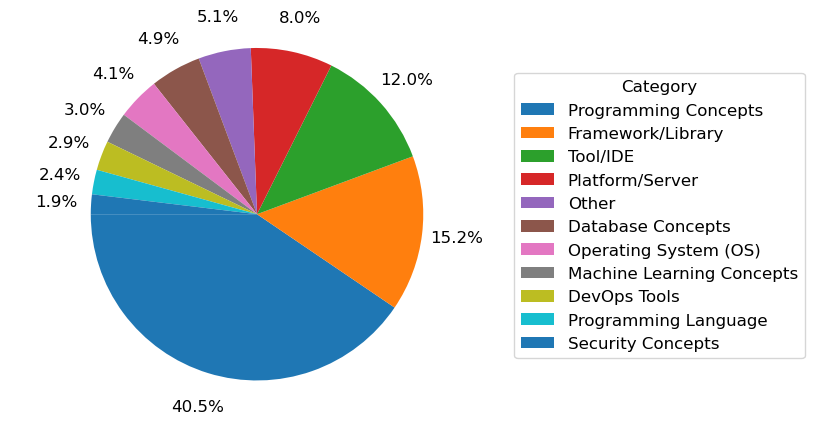

In [83]:
draw_pie_chart(pd_tags)

In [ ]:
def draw_treemap(df):
    # Count occurrences of each category in 'Final_Label'
    category_data = df['Final_Label'].value_counts(normalize=True) * 100
    category_labels = [f"{label}\n{value:.2f}%" for label, value in category_data.items()]

    # Setting the size of the plot
    plt.figure(figsize=(12, 8))
    
    # Creating the treemap
    colors = plt.cm.viridis(np.linspace(0, 1, len(category_labels)))  # Generating colors
    squarify.plot(sizes=category_data.values, label=category_labels, color=colors, alpha=0.8)

    # Adding title and removing axes
    plt.title('Distribution of the Tags\' Categories')
    plt.axis('off')

    # Save the plot as a PNG
    plt.savefig('tags_distribution_treemap.png', bbox_inches='tight')

    # Show the plot
    plt.show()

In [ ]:
draw_treemap(pd_tags)